In [1]:
# Add the dependencies.
import pandas as pd
import os
from sqlalchemy import create_engine, func
from config import DATABASE_URI
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import accuracy_score
from tensorflow.keras import metrics
#from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

VALIDATION (MEASURED) RUN ANALYSIS TO CHECK WITH (EXPECTED) VALUES
This code very similar to alldata.ipynb

In [2]:
#read data from validation run
results_df = pd.read_csv('datapressure.csv')
results_df

,idd,t1,pr1,f1,f2,f3,o_o,pw1,re,x1,x2,x1r,x2r,z,a1
0,C3,80,0.0002,50,50,50,False,0,0.0,48.6,30.8,48.6,30.8,4.78 - 73.0j,0.0
1,C3,208,0.0002,50,50,50,False,0,0.0,48.6,30.8,48.6,30.8,4.78 - 73.0j,0.0
2,C3,300,0.0002,50,50,50,False,0,0.0,48.6,30.8,48.6,30.8,4.78 - 73.0j,0.0
3,C3,394,0.0002,50,50,50,False,0,0.0,48.6,30.8,48.6,30.8,4.78 - 73.0j,0.0
4,C3,519,0.0002,50,50,50,False,0,0.0,48.6,30.8,48.6,30.8,4.78 - 73.0j,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1846,C3,202712,0.0003,80,80,80,False,250,0.0,59.1,19.5,59.1,19.4,3.24 - 48.1j,0.0
1847,C3,202804,0.0003,80,80,80,False,250,0.0,59.1,19.5,59.1,19.4,3.24 - 48.1j,0.0
1848,C3,202915,0.0003,80,80,80,False,250,0.0,59.1,19.5,59.1,19.4,3.24 - 48.1j,0.0
1849,C3,203027,0.0003,80,80,80,False,250,0.0,59.1,19.5,59.1,19.4,3.24 - 48.1j,0.0


In [3]:
#anaalyse the validation run
temp1_df = results_df[results_df['o_o'] == True]
temp1_df['pw1_Diff'] = temp1_df['pw1'].diff()
temp1_df['index1'] = temp1_df.index
temp1_df.head()

C:\Users\laksh\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\laksh\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,idd,t1,pr1,f1,f2,f3,o_o,pw1,re,x1,x2,x1r,x2r,z,a1,pw1_Diff,index1
22,C3,2510,0.0002,50,50,50,True,0,0.0,62.0,16.3,48.6,30.8,4.78 - 73.0j,0.0,NaN,22
23,C3,2620,0.0002,50,50,50,True,0,0.0,62.0,16.3,48.6,30.8,4.78 - 73.0j,0.0,0.0,23
24,C3,2715,0.0002,50,50,50,True,0,0.0,62.0,16.3,48.6,30.8,4.78 - 73.0j,0.0,0.0,24
25,C3,2827,0.0002,50,50,50,True,0,0.0,62.0,16.3,48.6,30.8,4.78 - 73.0j,0.0,0.0,25
26,C3,2934,0.0002,50,50,50,True,0,0.0,62.0,16.3,48.6,30.8,4.78 - 73.0j,0.0,0.0,26


In [4]:
temp2_df = temp1_df[(temp1_df['pw1'] > 0) & \
                    ((temp1_df['re'] > temp1_df['pw1']*0.05 )|(temp1_df['re'] == 0)) & (temp1_df['pr1'] > 0.005)]
temp2_df.tail()

,idd,t1,pr1,f1,f2,f3,o_o,pw1,re,x1,x2,x1r,x2r,z,a1,pw1_Diff,index1
1532,C3,168214,0.0502,80,80,80,True,500,37.268,63.5,25.9,41.0,24.8,5.79 - 58.5j,161.2,0.0,1532
1617,C3,177514,0.0503,80,80,80,True,250,177.308,59.1,19.5,59.1,19.5,3.24 - 48.1j,0.0,250.0,1617
1618,C3,177614,0.0503,80,80,80,True,250,187.420,59.1,19.5,59.1,19.5,3.25 - 48.6j,0.0,0.0,1618
1619,C3,177711,0.0503,80,80,80,True,250,187.420,59.1,19.5,59.1,19.5,3.25 - 48.6j,168.0,0.0,1619
1620,C3,177847,0.0503,80,80,80,True,250,125.276,59.1,19.5,58.7,22.1,3.25 - 48.6j,168.0,0.0,1620


In [5]:
temp2_df['index1_Diff'] = temp2_df['index1'] - temp2_df['index1'].shift(-1)
temp2_df.tail()

C:\Users\laksh\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,idd,t1,pr1,f1,f2,f3,o_o,pw1,re,x1,x2,x1r,x2r,z,a1,pw1_Diff,index1,index1_Diff
1532,C3,168214,0.0502,80,80,80,True,500,37.268,63.5,25.9,41.0,24.8,5.79 - 58.5j,161.2,0.0,1532,-85.0
1617,C3,177514,0.0503,80,80,80,True,250,177.308,59.1,19.5,59.1,19.5,3.24 - 48.1j,0.0,250.0,1617,-1.0
1618,C3,177614,0.0503,80,80,80,True,250,187.420,59.1,19.5,59.1,19.5,3.25 - 48.6j,0.0,0.0,1618,-1.0
1619,C3,177711,0.0503,80,80,80,True,250,187.420,59.1,19.5,59.1,19.5,3.25 - 48.6j,168.0,0.0,1619,-1.0
1620,C3,177847,0.0503,80,80,80,True,250,125.276,59.1,19.5,58.7,22.1,3.25 - 48.6j,168.0,0.0,1620,NaN


In [6]:
temp3_df = temp2_df[((temp2_df['pw1_Diff'] > 0) & (temp2_df['index1_Diff'] == -1))|(temp2_df['index1_Diff'] <-4) ]
temp3_df.tail()

,idd,t1,pr1,f1,f2,f3,o_o,pw1,re,x1,x2,x1r,x2r,z,a1,pw1_Diff,index1,index1_Diff
1435,C3,157552,0.0502,80,80,80,True,750,164.644,58.2,21.1,58.2,21.1,3.37 - 53.0j,0.0,750.0,1435,-1.0
1437,C3,157764,0.0502,80,80,80,True,750,194.192,58.2,21.1,58.2,21.1,3.37 - 53.3j,158.2,0.0,1437,-88.0
1525,C3,167441,0.0502,80,80,80,True,500,0.000,63.5,25.9,63.5,25.9,2.98 - 66.7j,0.0,500.0,1525,-1.0
1532,C3,168214,0.0502,80,80,80,True,500,37.268,63.5,25.9,41.0,24.8,5.79 - 58.5j,161.2,0.0,1532,-85.0
1617,C3,177514,0.0503,80,80,80,True,250,177.308,59.1,19.5,59.1,19.5,3.24 - 48.1j,0.0,250.0,1617,-1.0


In [7]:
temp3_df['time'] = temp3_df['t1'].diff()
temp3_df.tail()

C:\Users\laksh\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,idd,t1,pr1,f1,f2,f3,o_o,pw1,re,x1,x2,x1r,x2r,z,a1,pw1_Diff,index1,index1_Diff,time
1435,C3,157552,0.0502,80,80,80,True,750,164.644,58.2,21.1,58.2,21.1,3.37 - 53.0j,0.0,750.0,1435,-1.0,9751.0
1437,C3,157764,0.0502,80,80,80,True,750,194.192,58.2,21.1,58.2,21.1,3.37 - 53.3j,158.2,0.0,1437,-88.0,212.0
1525,C3,167441,0.0502,80,80,80,True,500,0.000,63.5,25.9,63.5,25.9,2.98 - 66.7j,0.0,500.0,1525,-1.0,9677.0
1532,C3,168214,0.0502,80,80,80,True,500,37.268,63.5,25.9,41.0,24.8,5.79 - 58.5j,161.2,0.0,1532,-85.0,773.0
1617,C3,177514,0.0503,80,80,80,True,250,177.308,59.1,19.5,59.1,19.5,3.24 - 48.1j,0.0,250.0,1617,-1.0,9300.0


In [8]:
temp3_df

,idd,t1,pr1,f1,f2,f3,o_o,pw1,re,x1,x2,x1r,x2r,z,a1,pw1_Diff,index1,index1_Diff,time
67,C3,7435,0.0051,50,50,50,True,250,196.028,62.0,16.3,62.0,16.3,2.92 - 37.4j,0.00,250.0,67,-1.0,NaN
78,C3,8724,0.0100,50,50,50,True,250,50.752,62.0,16.3,66.0,28.0,2.57 - 72.3j,207.00,0.0,78,-7.0,1289.0
108,C3,11942,0.0183,50,50,50,True,250,12.860,62.0,16.3,64.4,23.9,5.12 - 62.4j,167.20,0.0,108,-50.0,3218.0
158,C3,17438,0.0183,50,50,50,True,500,196.296,48.5,31.0,48.4,30.9,4.80 - 73.3j,0.00,500.0,158,-1.0,5496.0
202,C3,22252,0.0182,50,50,50,True,500,27.016,48.5,31.0,64.9,23.8,2.82 - 62.2j,202.20,0.0,202,-47.0,4814.0
249,C3,27401,0.0183,50,50,50,True,750,245.140,48.6,30.8,48.6,30.8,4.78 - 73.0j,0.00,750.0,249,-1.0,5149.0
269,C3,29572,0.0183,50,50,50,True,750,38.624,48.6,30.8,63.9,23.9,2.91 - 62.3j,214.00,0.0,269,-72.0,2171.0
341,C3,37465,0.0184,50,50,50,True,750,61.588,51.9,29.9,51.9,29.9,4.31 - 72.3j,0.00,750.0,341,-1.0,7893.0
347,C3,38127,0.0184,50,50,50,True,750,47.504,51.9,29.9,53.4,25.2,3.48 - 62.7j,215.00,0.0,347,-84.0,662.0
431,C3,47347,0.0184,50,50,50,True,500,200.756,55.1,31.7,55.1,31.7,3.88 - 76.4j,0.00,500.0,431,-1.0,9220.0


In [9]:
temp3_df.drop(temp3_df.tail(1).index,inplace=True) # drop last n rows
temp3_df.tail()

C:\Users\laksh\anaconda3\envs\PythonData\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,idd,t1,pr1,f1,f2,f3,o_o,pw1,re,x1,x2,x1r,x2r,z,a1,pw1_Diff,index1,index1_Diff,time
1346,C3,147801,0.0498,80,80,80,True,750,46.368,58.4,25.8,49.5,23.8,4.46 - 57.6j,180.0,0.0,1346,-89.0,317.0
1435,C3,157552,0.0502,80,80,80,True,750,164.644,58.2,21.1,58.2,21.1,3.37 - 53.0j,0.0,750.0,1435,-1.0,9751.0
1437,C3,157764,0.0502,80,80,80,True,750,194.192,58.2,21.1,58.2,21.1,3.37 - 53.3j,158.2,0.0,1437,-88.0,212.0
1525,C3,167441,0.0502,80,80,80,True,500,0.000,63.5,25.9,63.5,25.9,2.98 - 66.7j,0.0,500.0,1525,-1.0,9677.0
1532,C3,168214,0.0502,80,80,80,True,500,37.268,63.5,25.9,41.0,24.8,5.79 - 58.5j,161.2,0.0,1532,-85.0,773.0


In [10]:
temp4_df = temp3_df[(temp3_df['index1_Diff'] < -1 ) & (temp3_df['pw1_Diff'] ==0 )]
temp4_df.head()

,idd,t1,pr1,f1,f2,f3,o_o,pw1,re,x1,x2,x1r,x2r,z,a1,pw1_Diff,index1,index1_Diff,time
78,C3,8724,0.0100,50,50,50,True,250,50.752,62.0,16.3,66.0,28.0,2.57 - 72.3j,207.0,0.0,78,-7.0,1289.0
108,C3,11942,0.0183,50,50,50,True,250,12.860,62.0,16.3,64.4,23.9,5.12 - 62.4j,167.2,0.0,108,-50.0,3218.0
202,C3,22252,0.0182,50,50,50,True,500,27.016,48.5,31.0,64.9,23.8,2.82 - 62.2j,202.2,0.0,202,-47.0,4814.0
269,C3,29572,0.0183,50,50,50,True,750,38.624,48.6,30.8,63.9,23.9,2.91 - 62.3j,214.0,0.0,269,-72.0,2171.0
347,C3,38127,0.0184,50,50,50,True,750,47.504,51.9,29.9,53.4,25.2,3.48 - 62.7j,215.0,0.0,347,-84.0,662.0


In [11]:
temp4_df

,idd,t1,pr1,f1,f2,f3,o_o,pw1,re,x1,x2,x1r,x2r,z,a1,pw1_Diff,index1,index1_Diff,time
78,C3,8724,0.0100,50,50,50,True,250,50.752,62.0,16.3,66.0,28.0,2.57 - 72.3j,207.00,0.0,78,-7.0,1289.0
108,C3,11942,0.0183,50,50,50,True,250,12.860,62.0,16.3,64.4,23.9,5.12 - 62.4j,167.20,0.0,108,-50.0,3218.0
202,C3,22252,0.0182,50,50,50,True,500,27.016,48.5,31.0,64.9,23.8,2.82 - 62.2j,202.20,0.0,202,-47.0,4814.0
269,C3,29572,0.0183,50,50,50,True,750,38.624,48.6,30.8,63.9,23.9,2.91 - 62.3j,214.00,0.0,269,-72.0,2171.0
347,C3,38127,0.0184,50,50,50,True,750,47.504,51.9,29.9,53.4,25.2,3.48 - 62.7j,215.00,0.0,347,-84.0,662.0
443,C3,48719,0.0183,50,50,50,True,500,25.532,55.1,31.7,54.9,25.0,3.37 - 62.7j,204.60,0.0,443,-32.0,1372.0
475,C3,52210,0.0182,50,50,50,True,500,25.632,55.1,31.7,64.9,23.8,2.83 - 62.2j,200.60,0.0,475,-48.0,3491.0
567,C3,62350,0.0184,50,50,50,True,250,13.436,53.9,30.7,64.5,23.8,2.86 - 62.0j,168.00,0.0,567,-46.0,4923.0
623,C3,68503,0.0353,70,70,70,True,250,29.732,53.9,30.7,48.9,24.9,4.14 - 59.4j,147.39,0.0,623,-81.0,1111.0
707,C3,77715,0.0378,70,70,70,True,500,56.344,53.7,25.7,49.6,24.5,4.39 - 59.1j,134.39,0.0,707,-88.0,334.0


In [12]:
temp4_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 78 to 1532
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   idd          19 non-null     object 
 1   t1           19 non-null     int64  
 2   pr1          19 non-null     float64
 3   f1           19 non-null     int64  
 4   f2           19 non-null     int64  
 5   f3           19 non-null     int64  
 6   o_o          19 non-null     bool   
 7   pw1          19 non-null     int64  
 8   re           19 non-null     float64
 9   x1           19 non-null     float64
 10  x2           19 non-null     float64
 11  x1r          19 non-null     float64
 12  x2r          19 non-null     float64
 13  z            19 non-null     object 
 14  a1           19 non-null     float64
 15  pw1_Diff     19 non-null     float64
 16  index1       19 non-null     int64  
 17  index1_Diff  19 non-null     float64
 18  time         19 non-null     float64
dtypes: bool

In [39]:
#ignore runs that failed inthe machine
temp5_df = temp4_df[temp4_df["time"]<1350]
temp5_df

,idd,t1,pr1,f1,f2,f3,o_o,pw1,re,x1,x2,x1r,x2r,z,a1,pw1_Diff,index1,index1_Diff,time
78,C3,8724,0.0100,50,50,50,True,250,50.752,62.0,16.3,66.0,28.0,2.57 - 72.3j,207.00,0.0,78,-7.0,1289.0
347,C3,38127,0.0184,50,50,50,True,750,47.504,51.9,29.9,53.4,25.2,3.48 - 62.7j,215.00,0.0,347,-84.0,662.0
623,C3,68503,0.0353,70,70,70,True,250,29.732,53.9,30.7,48.9,24.9,4.14 - 59.4j,147.39,0.0,623,-81.0,1111.0
707,C3,77715,0.0378,70,70,70,True,500,56.344,53.7,25.7,49.6,24.5,4.39 - 59.1j,134.39,0.0,707,-88.0,334.0
799,C3,87814,0.0377,70,70,70,True,750,197.056,51.6,19.4,51.2,20.9,4.20 - 52.9j,161.00,0.0,799,-88.0,444.0
892,C3,98001,0.0377,70,70,70,True,750,186.948,51.9,17.4,50.8,21.2,4.25 - 54.8j,165.20,0.0,892,-87.0,539.0
982,C3,107858,0.0379,70,70,70,True,500,104.208,57.9,20.3,57.7,21.0,3.43 - 54.4j,161.39,0.0,982,-88.0,339.0
1074,C3,117934,0.0380,70,70,70,True,250,153.880,63.8,18.9,62.6,20.6,2.98 - 54.7j,157.60,0.0,1074,-87.0,418.0
1163,C3,127718,0.0470,80,80,80,True,250,15.976,51.3,23.8,51.3,23.8,4.23 - 58.9j,139.00,0.0,1163,-90.0,247.0
1263,C3,138711,0.0500,80,80,80,True,500,25.904,57.4,34.3,34.2,27.9,6.73 - 60.7j,154.39,0.0,1263,-80.0,1142.0


In [40]:
#just make a copy of actual time column. This will be replaced later with predicted values from before
temp5_df["ptime"] = temp5_df['time']

C:\Users\laksh\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [58]:
ef=temp5_df['time'].tolist()
print(ef)

[1289.0, 662.0, 1111.0, 334.0, 444.0, 539.0, 339.0, 418.0, 247.0, 1142.0, 317.0, 212.0, 773.0]


In [41]:
#predicted times taht were used to create the input paramenters
stime = [1500,600,1000,800,600,500,400,400,1000,800,600,500,500]

In [42]:
#enter the actual predicted values from the original file
temp5_df["ptime"] = stime

C:\Users\laksh\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [43]:
#dataframe with data of interest
temp5_df=temp5_df[['pr1','time','ptime']]

In [44]:
temp5_df.describe()

,pr1,time,ptime
count,13.000000,13.000000,13.000000
mean,0.038462,602.076923,707.692308
std,0.012365,367.267265,312.147237
min,0.010000,212.000000,400.000000
25%,0.037700,334.000000,500.000000
50%,0.037900,444.000000,600.000000
75%,0.049800,773.000000,800.000000
max,0.050200,1289.000000,1500.000000


In [45]:
#code for poly fit (1 for linear)
import numpy as np
x= np.array(temp5_df["ptime"])
y = np.array(temp5_df["time"])
m, b = np.polyfit(x, y, 1)

In [48]:
print("m:", m)
print("b:",b)

m: 0.7285065789473675
b: 86.51842105263212


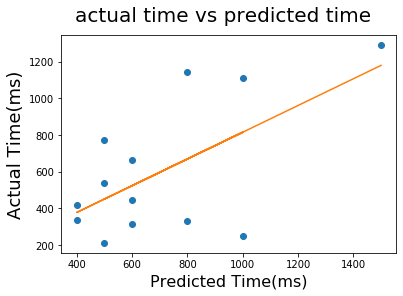

In [59]:
fig = plt.figure()
fig.suptitle('actual time vs predicted time', fontsize=20)
plt.ylabel('Actual Time(ms)', fontsize=18)
plt.xlabel('Predicted Time(ms)', fontsize=16)
plt.plot(x, y, 'o')
#create scatter plot

plt.plot(x, m*x + b)
fig.savefig('actual_predicted_time.PNG')

In [54]:
#use scipy to get slope,r_value etc
import scipy
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)

In [55]:
print(slope, intercept, r_value, p_value, std_err)

0.7285065789473684 86.51842105263165 0.6191712073707465 0.02403589581420583 0.2785721249942579
